In [41]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


Import Data:

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 345s 2us/step


In [7]:
x_train, x_test = x_train/255., x_test/255.

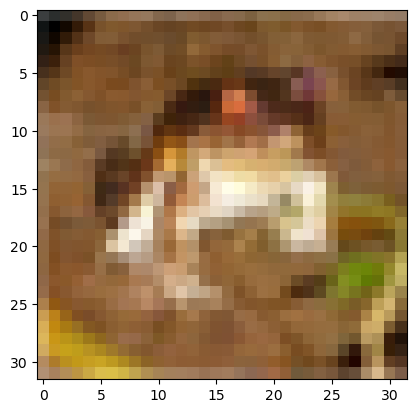

In [9]:
plt.imshow(x_train[0])

Create a model:

In [23]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = keras.Sequential()

model.add(Conv2D(32, 3, input_shape=(32,32,3), padding = 'same', activation='relu'))
model.add(Conv2D(32,3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,3, padding='same', activation='relu'))
model.add(Conv2D(64,3, padding='same', activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [26]:
loss = keras.losses.SparseCategoricalCrossentropy()
opt = keras.optimizers.legacy.Adam()
metrics=['acc']
model.compile(opt,loss, metrics)

Train the model:

In [27]:
epochs = 5
batch_size = 64
history = model.fit(x_train, y_train, 
                    validation_data=(x_test,y_test),
                    epochs=epochs, batch_size=batch_size)

Epoch 1/5


2023-02-04 21:59:50.680715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.4108 - acc: 0.4868

2023-02-04 22:00:09.797791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 21s 26ms/step - loss: 1.4108 - acc: 0.4868 - val_loss: 1.0386 - val_acc: 0.6295
Epoch 2/5
782/782 [==============================] - 19s 24ms/step - loss: 0.9033 - acc: 0.6805 - val_loss: 0.8312 - val_acc: 0.7077
Epoch 3/5
782/782 [==============================] - 19s 24ms/step - loss: 0.6871 - acc: 0.7596 - val_loss: 0.7598 - val_acc: 0.7359
Epoch 4/5
782/782 [==============================] - 19s 24ms/step - loss: 0.5163 - acc: 0.8190 - val_loss: 0.7825 - val_acc: 0.7394
Epoch 5/5
782/782 [==============================] - 19s 24ms/step - loss: 0.3576 - acc: 0.8744 - val_loss: 0.8774 - val_acc: 0.7413


Model evaluation:

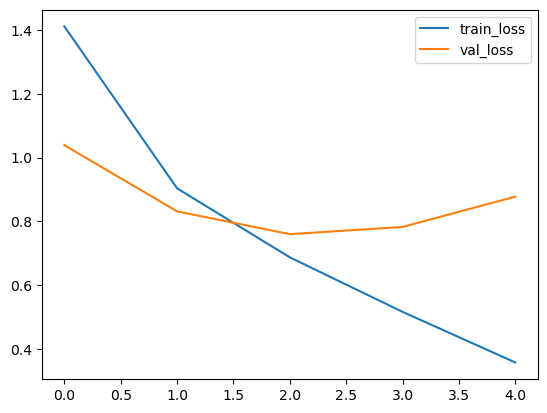

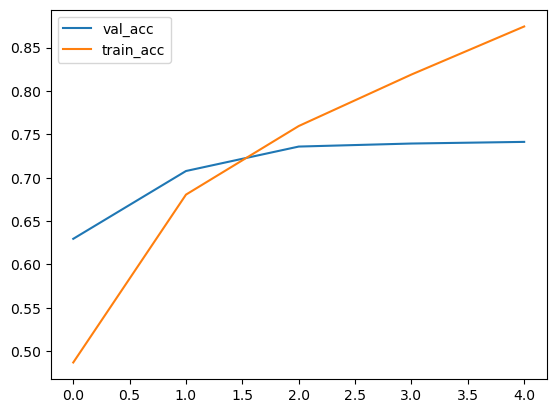

In [39]:
train_loss = history.history['loss']
train_acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()

plt.figure()

plt.plot(val_acc, label='val_acc')
plt.plot(train_acc, label='train_acc')
plt.legend()

Classify an image using the trained model:

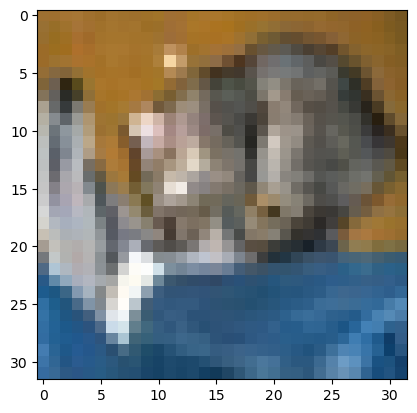

In [53]:
test_image = x_test[0]
plt.imshow(test_image)

In [52]:
pred =model.predict(np.expand_dims(test_image,0))

class_pred = np.argmax(pred)

print("predicted class {}".format(class_pred))

print("true class {}".format(y_test[0]))

1/1 [==============================] - 0s 15ms/step
predicted class 3
true class [3]
